# IGEL Training School: Perspective, Abstraction, and Psychological Distance

### 23 July, 2024
### Dr James Carney
### <i>Associate Professor</i>
### <i>The London Interdisciplinary School</i>

In [ ]:
!pip install pingouin
from PIL import Image
import plotly.graph_objects as go
import requests
import pingouin as pg
import plotly.express as px
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import spacy
import re
import pingouin
nlp = spacy.load('en_core_web_sm')
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

custom_style = {
    "axes.facecolor": "#343434",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "figure.facecolor": "#343434",
    "grid.color": "none",  # Remove gridlines
    "text.color": "white",
    "lines.color": "white",  # Default line color
    "lines.markeredgecolor": "white",  # Default marker edge color
    "lines.markerfacecolor": "white",  # Default marker face color
}

# Apply the custom style
plt.rcParams.update(custom_style)

nlp = spacy.load("en_core_web_sm")
nlp.vocab["\n"].is_stop = True
nlp.max_length = 4353682

def process(text):
    parsed_text = nlp(text)
    full_vocab = [token.lemma_.lower() for token in parsed_text \
                   if not token.is_stop and\
                   not token.is_punct
                  #below I add some new criteria - CR
                  and not token.text.strip() == ''       #remove empty text
                  and token.is_ascii
                  and re.match('[a-zA-Z]',token.text) #remove non ascii
                  and not re.match('^[\n]+$',token.text) #remove multiple line breaks
                  and not token.like_url                 #remove urls
                  and not '&nbsp' in token.text and not token.like_num]         # remove html garble
    return full_vocab

# Question: Why do we find the following situations hard to predict?

* Events that are far away in space
* Events that are remote in time
* Events that are socially unfamiliar?
* Events that are probilistically unlikely

# Construal level theory: Psychological distance and abstraction

>### As psychological distance increases, construals would become more abstract, and as level of abstraction increases, so too would the psychological distances people envisage. (440)

Trope, Y. & Liberman, N. (2010). [Construal-level theory of psychological distance](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3152826/). <i>Psychological Review</i> 117. 440-463.





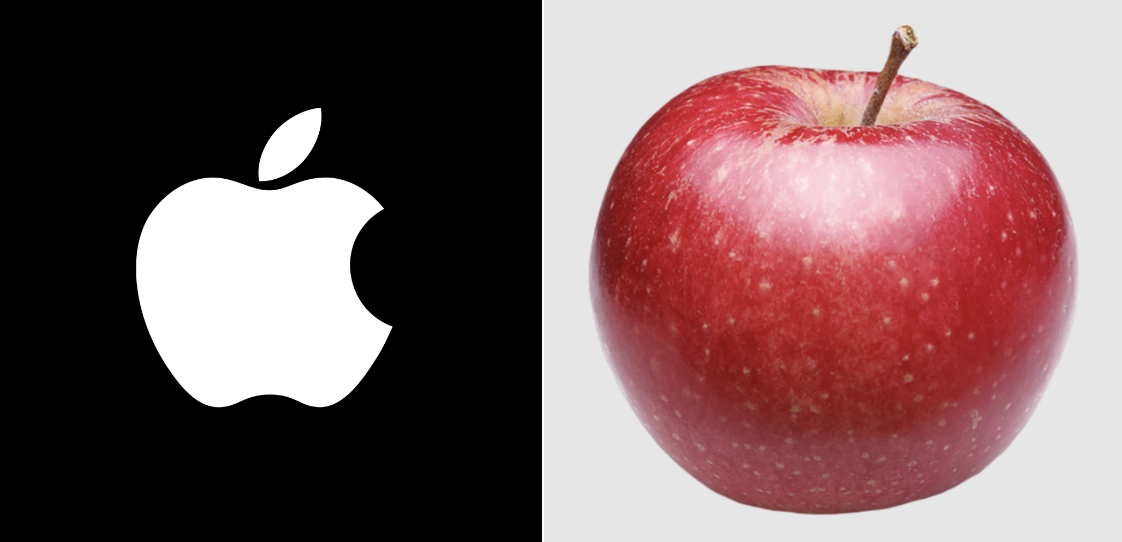

In [ ]:
url = 'https://raw.githubusercontent.com/texturejc/IGEL/main/CLT_apples.png'
im = Image.open(requests.get(url, stream=True).raw)
im

# Core claim: We can usefully use measures of abstraction (or concreteness) to quantify the expectation of psychological distance an item of language is likely to provoke.

## Let's load some word norm data; this includes concreteness as one the variables. We'll talk about the others shortly.

In [ ]:
norms = pd.read_pickle("https://raw.githubusercontent.com/texturejc/IGEL/main/public_norms.pkl")

# Note that this is unpublished data that I've compiled from various published sources. It's been rescaled
# between 0 and 1 for all values, and some values are extraploated using machine learning. If you use it, please
# note these caveats!

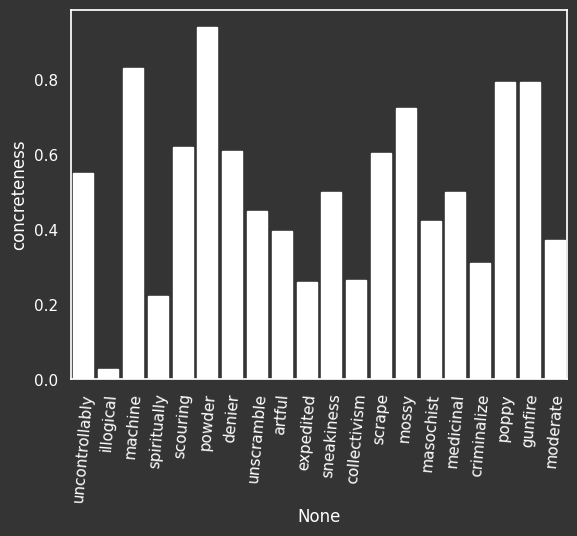

In [ ]:
norms_sample = norms.sample(n= 20)

sns.barplot(x = norms_sample.index, y = 'concreteness', color = 'white', data = norms_sample)
plt.xticks(rotation=85)
plt.show()




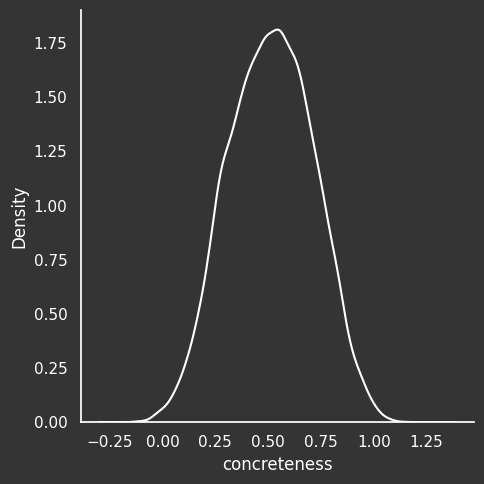

In [ ]:
sns.displot(norms['concreteness'], color = 'white', kind = 'kde')

In [ ]:
norms

,valence,arousal,dominance,auditory,gustatory,interoceptive,olfactory,visual,foot_leg,hand_arm,head,mouth,torso,concreteness,imageability,semantic_size,haptic
pasta,0.625031,0.313147,0.602741,0.056880,0.716296,0.143776,0.527592,0.676622,0.049129,0.439398,0.372368,0.604321,0.189552,0.845719,0.811923,0.277372,0.446759
pizza,0.678299,0.403975,0.608465,0.206832,0.697916,0.140564,0.469951,0.709302,0.107829,0.421167,0.355039,0.654950,0.227032,0.866608,0.875202,0.439030,0.432834
sugary,0.495922,0.413351,0.505791,0.200587,0.480248,0.332203,0.344814,0.571219,0.093111,0.265100,0.379360,0.583972,0.208062,0.463145,0.500193,0.341709,0.347630
liquor,0.569142,0.413299,0.586566,0.279162,0.392532,0.259211,0.353637,0.635449,0.185198,0.360136,0.433191,0.534145,0.253626,0.702612,0.680910,0.467270,0.329930
lasagna,0.611658,0.366536,0.581837,0.165303,0.626115,0.189183,0.424233,0.649507,0.062141,0.354099,0.389339,0.620244,0.199468,0.700900,0.682871,0.397383,0.324415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zit,0.424670,0.313730,0.455007,0.218819,0.125908,0.212515,0.120111,0.669981,0.118706,0.344307,0.416504,0.262853,0.222355,0.819134,0.781729,0.232287,0.409891
zodiacal,0.327232,0.407189,0.394554,0.252882,0.012340,0.237332,0.034157,0.618945,0.093166,0.129335,0.527095,0.147862,0.117413,0.663206,0.654321,0.370062,0.115109
zombie,0.338112,0.602438,0.366321,0.366693,0.079092,0.317209,0.143378,0.723634,0.325283,0.379794,0.545920,0.212039,0.345707,0.680980,0.817338,0.652450,0.237516
zoological,0.459609,0.297790,0.483783,0.260469,0.037674,0.204608,0.116489,0.583957,0.215694,0.163743,0.486803,0.224468,0.177760,0.528383,0.426528,0.579440,0.094988


## But what about literary texts? Let's take Shakespeare's Sonnets as our working data

### Load the sonnets from a text file and clean the text. The variable `clean` contains the individual sonnets

In [ ]:
sonnets = "https://raw.githubusercontent.com/texturejc/IGEL/main/sonnets.txt"

texts = requests.get(sonnets)
texts = texts.text

sons = texts.split("\r\n\r\n\r\n")

clean = []

for i in sons:
    i = i.replace('\ufeff', '')
    i = i.replace('\n', ' ')
    i = i.replace('\r', ' ')
    i = i.strip()
    clean.append(i)

clean = [i.lower() for i in clean]


In [ ]:
print(sons[0])

﻿                    1

From fairest creatures we desire increase,
That thereby beauty’s rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed’st thy light’s flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel:
Thou that art now the world’s fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak’st waste in niggarding:
  Pity the world, or else this glutton be,
  To eat the world’s due, by the grave and thee.


## Create two python functions that turns the texts into lemmas and scores them for our variables of interest

In [ ]:
def word_norms(text):
    lemmas = process(text)

    words = []
    norms_ = []

    for i in lemmas:
        if i in norms.index:
            norms_.append(norms.loc[i])
            words.append(i)
        else:
            pass
    norms_df = pd.DataFrame(norms, index = words)
    return norms_df

def word_norms_mean(text):
    lemmas = process(text)

    words = []
    norms_ = []

    for i in lemmas:
        if i in norms.index:
            norms_.append(norms.loc[i])
            words.append(i)
        else:
            pass
    norms_df = pd.DataFrame(norms_)
    return norms_df.mean()

In [ ]:
word_norms_mean(clean[1])

valence          0.606014
arousal          0.391034
dominance        0.592439
auditory         0.329886
gustatory        0.083915
interoceptive    0.276977
olfactory        0.107362
visual           0.601539
foot_leg         0.191936
hand_arm         0.321097
head             0.496878
mouth            0.299357
torso            0.218656
concreteness     0.447777
imageability     0.499000
semantic_size    0.531463
haptic           0.276342
dtype: float32

### Let's get all our sonnets into a dataframe so we can work with them quantitatively

In [ ]:
over_time = []

for i in clean:
  over_time.append(word_norms_mean(i))

over_time_df = pd.DataFrame(over_time)
name = ["Sonnet "+str(i+1) for i in over_time_df.index]
over_time_df['name'] = name

In [ ]:
over_time_df

,valence,arousal,dominance,auditory,gustatory,interoceptive,olfactory,visual,foot_leg,hand_arm,head,mouth,torso,concreteness,imageability,semantic_size,haptic,name
0,0.579727,0.406665,0.567452,0.310647,0.100202,0.287165,0.118586,0.598215,0.184587,0.309415,0.496853,0.295269,0.212002,0.450592,0.492055,0.550987,0.250091,Sonnet 1
1,0.606014,0.391034,0.592439,0.329886,0.083915,0.276977,0.107362,0.601539,0.191936,0.321097,0.496878,0.299357,0.218656,0.447777,0.499000,0.531463,0.276342,Sonnet 2
2,0.586884,0.394134,0.577617,0.342539,0.075050,0.264408,0.097860,0.615057,0.186851,0.324699,0.499707,0.295513,0.210901,0.495483,0.532161,0.527962,0.262227,Sonnet 3
3,0.606162,0.398689,0.599094,0.348139,0.087391,0.276020,0.102831,0.574123,0.184632,0.335039,0.491070,0.312445,0.204803,0.397363,0.430106,0.544994,0.259010,Sonnet 4
4,0.592193,0.389586,0.572033,0.292105,0.080856,0.257146,0.115279,0.651021,0.217942,0.349450,0.516324,0.258583,0.224293,0.499325,0.564432,0.510814,0.284365,Sonnet 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.589727,0.412211,0.583983,0.412273,0.068074,0.342953,0.084632,0.522502,0.177712,0.288417,0.517437,0.339172,0.205882,0.346799,0.395543,0.578094,0.211070,Sonnet 150
150,0.574876,0.427213,0.570596,0.390876,0.082774,0.347430,0.094919,0.539321,0.183463,0.289968,0.510479,0.363519,0.223674,0.377298,0.443774,0.569091,0.232888,Sonnet 151
151,0.562434,0.404925,0.563579,0.381442,0.064097,0.304908,0.085629,0.553573,0.168150,0.292188,0.498689,0.326980,0.194623,0.399715,0.442095,0.558685,0.231508,Sonnet 152
152,0.572781,0.419039,0.560230,0.314152,0.097658,0.299927,0.133849,0.617074,0.221618,0.365682,0.499922,0.291446,0.248221,0.535373,0.593490,0.526885,0.304513,Sonnet 153


In [ ]:
fig = px.scatter(over_time_df, x=over_time_df.index, y="valence", hover_data = ['name'], trendline="ols")
fig.update_layout(
    title= "Trend over time in Shakespeare's Sonnets",
    paper_bgcolor="#343434",
    plot_bgcolor="#343434",
    font=dict(color='white'),
    xaxis=dict(showgrid=True, title="Sonnet"),
    yaxis=dict(showgrid=True)
)
fig.update_traces(line=dict(color='red'), selector=dict(mode='lines'))
fig.show()

In [ ]:
print(sons[28])

                    29

When in disgrace with fortune and men’s eyes,
I all alone beweep my outcast state,
And trouble deaf heaven with my bootless cries,
And look upon my self and curse my fate,
Wishing me like to one more rich in hope,
Featured like him, like him with friends possessed,
Desiring this man’s art, and that man’s scope,
With what I most enjoy contented least,
Yet in these thoughts my self almost despising,
Haply I think on thee, and then my state,
(Like to the lark at break of day arising
From sullen earth) sings hymns at heaven’s gate,
  For thy sweet love remembered such wealth brings,
  That then I scorn to change my state with kings.


In [ ]:
lm = pg.linear_regression(over_time_df.index, over_time_df['valence'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.595423,0.004335,137.344294,2.630424e-161,0.078957,0.072897,0.586858,0.603988
1,x1,-0.000177,0.000049,-3.609745,4.155433e-04,0.078957,0.072897,-0.000274,-0.000080


## But is concreteness actually a primitive variable? What does it mean to say something is concrete? After all, we have six sensory modalities, so is concreteness maybe a compound of these six. [The Lanacaster sensorimotor norms](https://www.lancaster.ac.uk/psychology/lsnorms/) give us a way of unpacking concreteness into its subcomponents.

In [ ]:
# Sample data for the radar chart
categories = norms.columns

word_1 = "concept"
word_2 = "cat"

word_1_values = norms.loc[word_1]
word_2_values = norms.loc[word_2]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=word_1_values,
    theta=categories,
    fill='toself',
    name=word_1,
    line=dict(color='blue')
))

fig.add_trace(go.Scatterpolar(
    r=word_2_values,
    theta=categories,
    fill='toself',
    name=word_2,
    line=dict(color='red')
))

# Update layout for higher resolution and clearer text
fig.update_layout(
    polar=dict(
        bgcolor='#343434',
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=True, ticks=''),
        angularaxis=dict(showticklabels=True, ticks='')
    ),
    paper_bgcolor='#343434',
    plot_bgcolor='#343434',
    showlegend=True,
    legend=dict(
        font=dict(size=18, color='white')
    ),
    font=dict(size=16, color='white'),
    width=1200,
    height=800
)


# Display the figure
fig.show()



In [ ]:
english_words = pd.read_pickle("https://raw.githubusercontent.com/texturejc/IGEL/main/all_english_words.pkl")

In [ ]:
fig = px.scatter_3d(english_words, x='PC1', y='PC2', z='PC3',
               hover_data = ['word'])

fig.update_traces(marker=dict(size = 4, line=dict(width=0.01,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


fig.update_layout(
    title='3D projection of English words into perceptual space by sensory modality',
    scene=dict(
        xaxis=dict(backgroundcolor="#343434"),
        yaxis=dict(backgroundcolor="#343434"),
        zaxis=dict(backgroundcolor="#343434"),
    ),
    paper_bgcolor="#343434",
    plot_bgcolor="#343434",
    font=dict(color='white'),
    legend=dict(
        font=dict(size=18, color='white')
    )
)


fig.show()

## So let's go back to Shakespeare. What happens when we plot other modalities over time?

In [ ]:
fig = px.scatter(over_time_df, x=over_time_df.index, y="interoceptive", hover_data = ['name'], trendline="ols")
fig.update_layout(
    title= "Trend over time in Shakespeare's Sonnets",
    paper_bgcolor="#343434",
    plot_bgcolor="#343434",
    font=dict(color='white'),
    xaxis=dict(showgrid=True, title="Sonnet"),
    yaxis=dict(showgrid=True)
)
fig.update_traces(line=dict(color='red'), selector=dict(mode='lines'))
fig.show()

In [ ]:
print(sons[22])

                    23

As an unperfect actor on the stage,
Who with his fear is put beside his part,
Or some fierce thing replete with too much rage,
Whose strength’s abundance weakens his own heart;
So I for fear of trust, forget to say,
The perfect ceremony of love’s rite,
And in mine own love’s strength seem to decay,
O’ercharged with burthen of mine own love’s might:
O let my looks be then the eloquence,
And dumb presagers of my speaking breast,
Who plead for love, and look for recompense,
More than that tongue that more hath more expressed.
  O learn to read what silent love hath writ,
  To hear with eyes belongs to love’s fine wit.


In [ ]:
lm = pg.linear_regression(over_time_df.index, over_time_df['interoceptive'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.283634,0.004567,62.109731,6.351326e-110,0.043965,0.037675,0.274611,0.292656
1,x1,0.000136,0.000052,2.643866,9.056228e-03,0.043965,0.037675,0.000034,0.000238


In [ ]:
norms.columns

Index(['valence', 'arousal', 'dominance', 'auditory', 'gustatory',
       'interoceptive', 'olfactory', 'visual', 'foot_leg', 'hand_arm', 'head',
       'mouth', 'torso', 'concreteness', 'imageability', 'semantic_size',
       'haptic'],
      dtype='object')